# DataDex Project

## 1. Project Description

The aim of this project is to predict the outcome of a one-versus-one Pokémon battle based on the Pokémons' statistics (Attack, Defense etc), their type (Poison, Normal etc) and win-loss data from previous battles.

No Pokémon were harmed during this analysis.

In [17]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combat_df = pd.read_csv('Dataset\combats.csv')

combat_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [3]:
pokemon_df = pd.read_csv('Dataset\pokemon.csv')

# Renaming "#" to "Number"
pokemon_df = pokemon_df.rename(index=str, columns={"#": "Number"})

pokemon_df.head()

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## 2. Understanding the dataset
### For the Pokemon file
**Number:** Refers to the Pokémon's number in the [List of Pokémon by National Pokédex number](https://bulbapedia.bulbagarden.net/wiki/List_of_Pokémon_by_National_Pokédex_number).

**Type 1:** All Pokémon have a main type. Type 1 refers to the main type.

**Type 2:** Some Pokémon have a secondary type. Type 2 refers to the secondary type.

**HP, Attack, Defense, Sp. Atk, Sp. Def, Speed:** Refers to the Pokémon's stats.

**Generation:** Refers to the season of the show during which the Pokémon was released.

**Legendary:** Special attribute that only very few Pokémon have.

### For the Combat file
**First_pokemon:** The Number of the Pokémon who went first.

**Second_pokemon:** The Number of the Pokémon who went second.

**Winner:** The Number of the Pokémon who won.

## 3. Cleaning up the dataset
Let's make sure our dataset does not have any missing values.

In [4]:
# Empty values in the Pokémon DF
pokemon_df.isnull().sum()

Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Empty values in Type 2 is normal, since some Pokémon don't have a secondary type. From the analysis, we can deduce that there are 386 Pokémon without a secondary type.

We have one missing Pokémon name. Let's find it using this [link](https://bulbapedia.bulbagarden.net/wiki/List_of_Pokémon_by_National_Pokédex_number).

In [5]:
print("This pokemon is before the missing Pokemon: " + pokemon_df['Name'][61])
print(pokemon_df[pokemon_df['Name'].isnull()])
print("This pokemon is after the missing Pokemon: " + pokemon_df['Name'][63])

This pokemon is before the missing Pokemon: Mankey
    Number Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
62      63  NaN  Fighting    NaN  65     105       60       60       70   

    Speed  Generation  Legendary  
62     95           1      False  
This pokemon is after the missing Pokemon: Growlithe


So the missing Pokémon's number is 63. Using the link, we can see that the name of the missing Pokémon is Primeape. Let's add it.

In [6]:
# pokemon_df['Name'][62] = "Primeape" <- returns SettingWithCopyWarning

pokemon_df.loc[pokemon_df.Number == 63, 'Name'] = "Primeape"

# Display the new data
primeape = pokemon_df[pokemon_df["Number"] == 63]
primeape

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,1,False


In [7]:
pokemon_df.isnull().sum()

Number          0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

As we can see, the empty value has been replaced.

Now, let's see the range of values in our dataset.

In [8]:
pokemon_df.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Data Visualization

In order to choose the right visualisation method, first we have to see the different types of variables that our datasets contain.

In [9]:
print(pokemon_df.dtypes)

Number         int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [10]:
print(combat_df.dtypes)

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object


Let's see how a Pokémon's type(s) correlates with its wins.

In [12]:
pokemon_df.corr()

C:\Users\eyasf\AppData\Local\Temp\ipykernel_21072\3962370133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pokemon_df.corr()


,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Number,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


C:\Users\eyasf\AppData\Local\Temp\ipykernel_21072\1337307710.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pokemon_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


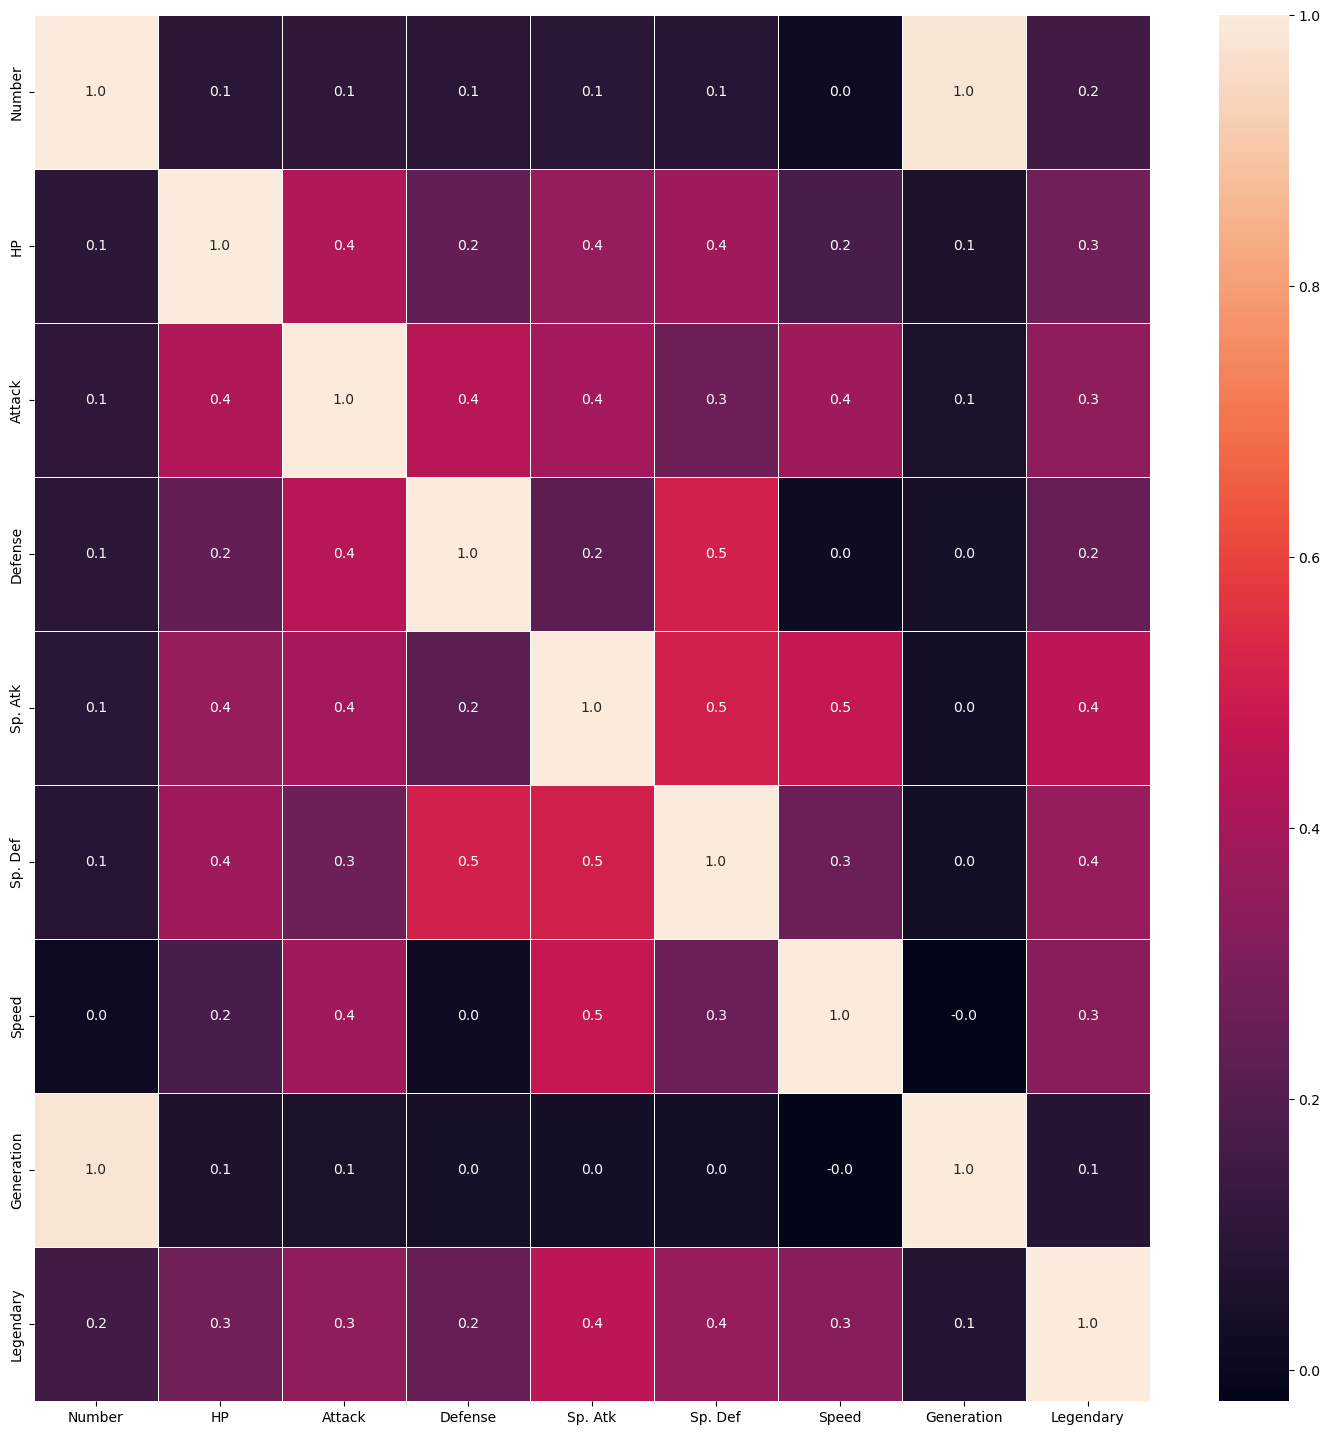

In [19]:
# Correlation Map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(pokemon_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()